## AccelerateAI - Python for Data Science - Assignment 06
#### Multiple Linear Regression

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#### Q1: MLR with 2 or more variables – Machine tools company
Benedrix, a machine tool company is interested in understand the impact of machine
hours and production run, on its overhead cost.
The data on a monthly basis for 3 years is provided in the dataset:
#### MLR_FactoryOverhead.csv
Fit the regression equations:
• Overhead = F (machine hours)
• Overhead = F (production runs)
• Overhead = F (machine hours, production runs)
1) Find the R-Squared in all 3 cases.
2) How would you explain the additional lift in R-squared of the combined model vs each of the individual model? 

In [3]:
MLR_Factory = pd.read_csv("C:\\Users\\theco\\MLR_FactoryOverhead.csv")

In [4]:
MLR_Factory.head()

,Month,Machine Hours,Production Runs,Overhead Cost
0,1,1539,31,99798
1,2,1284,29,87804
2,3,1490,27,93681
3,4,1355,22,82262
4,5,1500,35,106968


OverheadCost = β0 + (β1 * Machine_Hours) + (β2 * Production_Runs) + e

In [5]:
#Setting the value for X and Y
x = MLR_Factory[['Machine Hours', 'Production Runs']]
y = MLR_Factory['Overhead Cost']

In [6]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [7]:
#Fitting the Multiple Linear Regression model
mlr =  LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

(a.)

In [8]:
x = x_train.drop('Production Runs', 1,)

# Build a fitted model after dropping the variable
x_train_lm = sm.add_constant(x)

lr_1 = sm.OLS(y_train, x_train_lm).fit()

# Printing the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.03
Date:                Mon, 05 Sep 2022   Prob (F-statistic):            0.00297
Time:                        17:36:04   Log-Likelihood:                -260.95
No. Observations:                  25   AIC:                             525.9
Df Residuals:                      23   BIC:                             528.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.984e+04   1.45e+04      3.435

Regression Equation: OverheadCost = 49840 + 33.0755 * Machine Hours

In [ ]:
There is likelihood of stong multicollinearity and this suggest that the machine hours does
not necessarily impact the overhead cost.

(b.)

In [9]:
x = x_train.drop('Machine Hours', 1,)

# Build a fitted model after dropping the variable
x_train_lm = sm.add_constant(x)

lr_2 = sm.OLS(y_train, x_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     10.28
Date:                Mon, 05 Sep 2022   Prob (F-statistic):            0.00393
Time:                        17:36:17   Log-Likelihood:                -261.23
No. Observations:                  25   AIC:                             526.5
Df Residuals:                      23   BIC:                             528.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.428e+04   7510.995     

Regression Equation: OverheadCost = 74280 + 659.3544 * Production Runs

(c.)

In [65]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  4752.554843900842
Coefficients:


[('Machine Hours', 42.99839142990892), ('Production Runs', 865.1163483299028)]

In [ ]:
Regression Equation: Overhead Cost = 4752.5548 + (42.9984 * Machine Hours) + (865.1163 * Production Hours) + e

In [ ]:
From the above-obtained equation for the Multiple Linear Regression Model,
we can see that the value of intercept is 4752.5548, which shows that if we keep
the machine hours and production runs as 0, the estimated average overhead cost will
be 4752.5548 and a single increase in the machine hours increases overhead cost by 42.9984,
the production runs will increase overhead cost by 865.1163.

#### Q2. MLR with categorical variables – Courier Service
GoKart is a regional delivery service company providing different types of package
delivery services. An analyst wants to estimate the cost of shipping a package as
function of cargo type.
Cost of 15 randomly chosen packages of approximately the same weight, shipped to
almost similar distance, is provided in the file:
#### MLR_CourierService.csv
1) Estimate the appropriate multiple linear regression equation to predict the cost of
shipping a package.
2) Provide interpretation for the regression coefficients.
3) Which cargo type is the costliest? Which one is least costly?
4) How well does the regression fit the sample data? How can the goodness of fitness
be improved?
5) Predict the cost of shipping a package with semi-fragile cargo.

In [111]:
MLR_Courier = pd.read_csv("C:\\Users\\theco\\MLR_CourierService.csv")

In [112]:
MLR_Courier.head()

,Shipment,CargType,CosoShipment
0,1,Semifragile,84.0
1,2,Durable,24.0
2,3,Fragile,165.6
3,4,Fragile,133.2
4,5,Semifragile,120.0


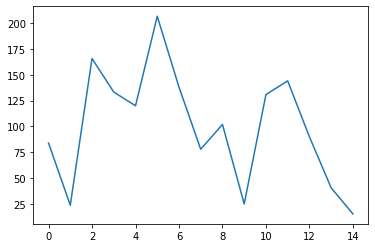

In [113]:
#separate the other attributes from the predicting attribute
x = MLR_Courier.drop('CosoShipment',axis=1)
#separte the predicting attribute into Y for model training 
y = MLR_Courier['CosoShipment']

MLR_Courier['CosoShipment'].plot(kind = 'line')
plt.show()

In [114]:
# handle categorical variable
CargType=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= MLR_Courier.drop('CargType',axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,CargType],axis=1)
x

,Shipment,CosoShipment,Shipment,CargType_Fragile,CargType_Semifragile
0,1,84.0,1,0,1
1,2,24.0,2,0,0
2,3,165.6,3,1,0
3,4,133.2,4,1,0
4,5,120.0,5,0,1
5,6,206.4,6,1,0
6,7,138.0,7,0,1
7,8,78.0,8,0,1
8,9,102.0,9,0,1
9,10,25.2,10,0,0


In [115]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [116]:
#Fitting the Multiple Linear Regression model
mlr =  LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [117]:
x = x_train.drop('Shipment', 1,)

# Build a fitted model after dropping the variable
x_train_lm = sm.add_constant(x)

lr_3 = sm.OLS(y_train, x_train_lm).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:           CosoShipment   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.129e+29
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.80e-117
Time:                        11:10:19   Log-Likelihood:                 340.46
No. Observations:                  12   AIC:                            -672.9
Df Residuals:                       8   BIC:                            -671.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.665e-14 

In [119]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  2.842170943040401e-14
Coefficients:


[('CosoShipment', 3.052497204094245e-16),
 ('CargType_Fragile', 0.9999999999999998),
 ('CargType_Semifragile', 3.778013861644499e-16)]

In [ ]:
CosoShipment = 2.8422 +  

In [91]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [107]:
y_prediction =  LR.predict(x_test)
y_prediction

array([25.2, 24. , 90. ])

In [108]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 1.0
mean_sqrd_error is== 1.0307782494887888e-27
root_mean_squared error of is== 3.210573546095446e-14


We see that the accuracy score (r2 score) is 1.0, this means we can use this model to solve multiple linear regression. In addition to this, the mean squared error rate is also low.

#### Q3: MLR with multiple variables – Employee Salary
An HR analyst in Unitech Pvt Ltd, wants to predict the annual salaries of given
employees using the potential explanatory variables in the file
#### MLR_EmpSalary.csv
1) Estimate the appropriate multiple linear regression equation to predict the salary of
an Unitech employee using all explanatory variables.
2) Do we need to exclude certain columns? Why?
3) Which department employees are paid the highest? By how much?
4) Do you see any discrimination in salaries earned by male and female employees?
5) What would be the estimated salary of a Data Scientist (joining engineering) with 10
years of work experience. This woman has 18 years of total education, and will be
supervising 4 junior employees.

In [126]:
MLR_EmpSalary = pd.read_csv("C:\\Users\\theco\\MLR_EmpSalary.csv")

In [127]:
MLR_EmpSalary.head()

,Employee,Salary,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other
0,1,"$65,487",0,27,22,44,0,1,1,0,0
1,2,"$46,184",3,20,14,1,1,0,1,0,0
2,3,"$32,782",1,0,17,0,1,0,0,1,0
3,4,"$54,899",5,12,18,0,0,1,1,0,0
4,5,"$34,869",5,7,14,1,0,1,1,0,0


In [170]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [86]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [87]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 25.2, 144. ,  84. ])

In [89]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 1.0
mean_sqrd_error is== 1.430467774800768e-27
root_mean_squared error of is== 3.782152528390107e-14


We see that the accuracy score is 1.0, this means we can use this model to solve multiple linear regression,
and also mean squared error rate is also low.

#### Q4: MLR with Interaction effect – Stock Price Prediction
Stock market analyst are continually looking for reliable predictors of stock price.
Consider the problem of modelling the stock price of Utility companies. Two variable
that are though to influence the stock price(Y) are return of average equity (ROE) and
annual dividend rate.
Data for 16 utility stocks are provided in the file
#### MLR_StockPrice.csv
1) Estimate the MLR equation from the given dataset
2) Interpret the Adjusted R-Squared value and each of the coefficients
3) Revise the Stock Price prediction model for utility companies, to include and
interaction term between ROE and Annual dividend rate. Does this new model fit
the data better than was done in Problem 10.

In [181]:
MLR_StockPrice = pd.read_csv("C:\\Users\\theco\\MLR_StockPrice.csv")

In [182]:
MLR_StockPrice.head()

,Electric Utility,Stock Price,ROE,Dividend
0,1,$23,13.7,2.36
1,2,$34,12.8,3.12
2,3,$20,6.9,2.48
3,4,$24,12.7,2.36
4,5,$20,15.3,1.92


In [193]:
x = MLR_StockPrice[['ROE', 'Dividend']]
y = MLR_StockPrice['Stock Price']

In [194]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)